In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#pip install imblearn

In [3]:
df = pd.read_csv('bank.csv', sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


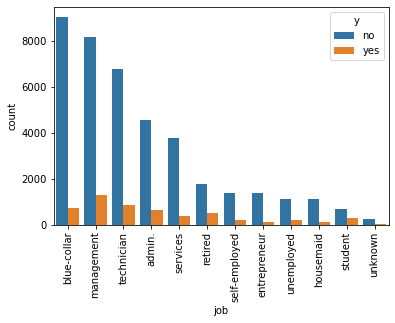

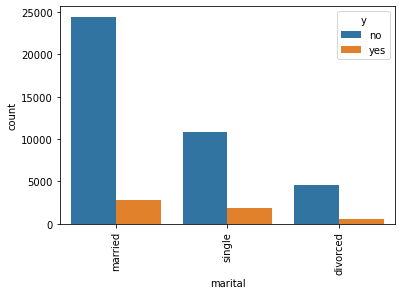

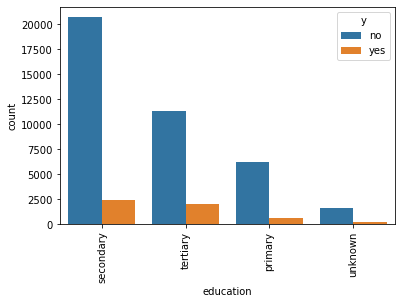

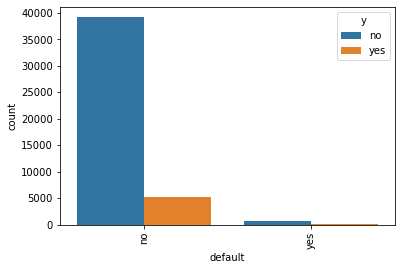

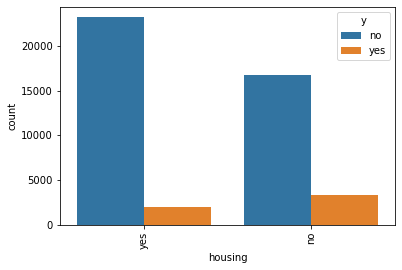

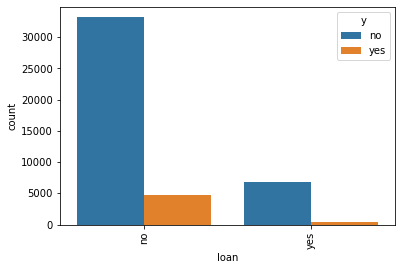

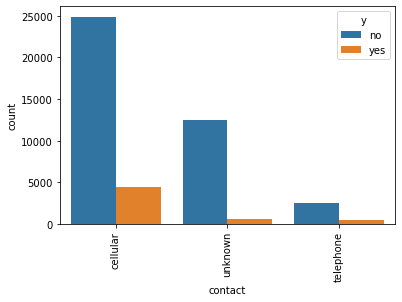

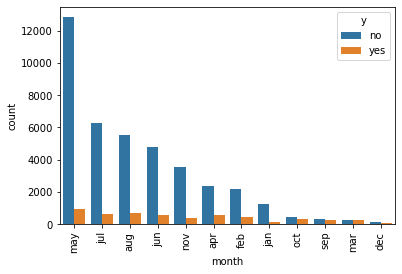

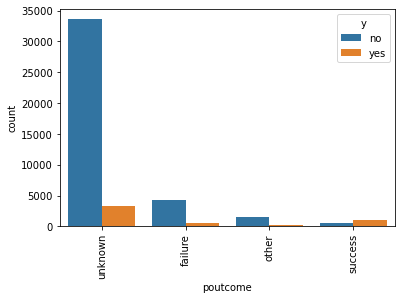

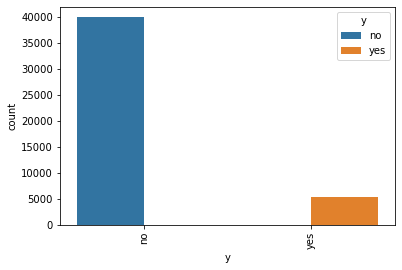

In [5]:
cat_cols = [x for x in df.columns if df[x].dtypes=='O']

for x in cat_cols:
    sns.countplot(x=x, data=df, hue='y', order=df[x].value_counts().index)
    plt.xticks(rotation=90);
    plt.show()

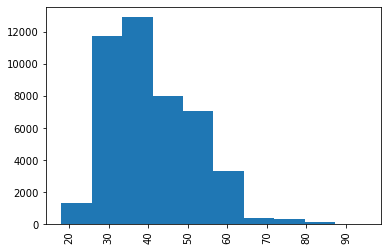

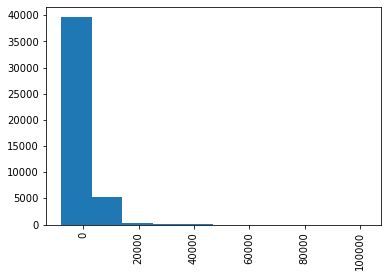

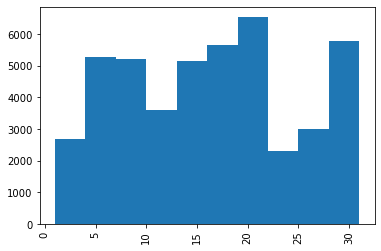

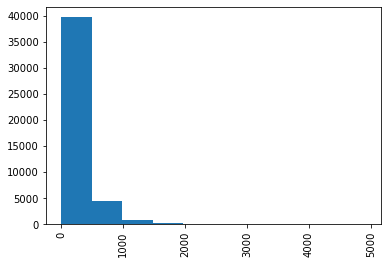

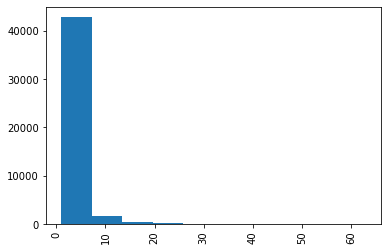

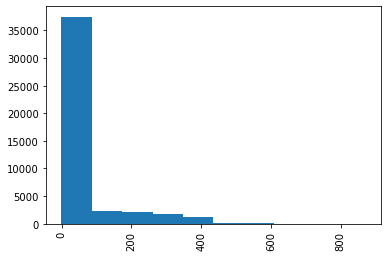

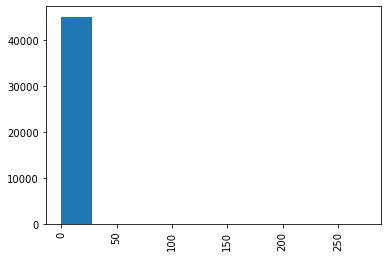

In [6]:
num_cols = [x for x in df.columns if df[x].dtypes!='O']

for x in num_cols:
    plt.hist(x=x, data=df)
    plt.xticks(rotation=90);
    plt.show()

<AxesSubplot:xlabel='marital', ylabel='count'>

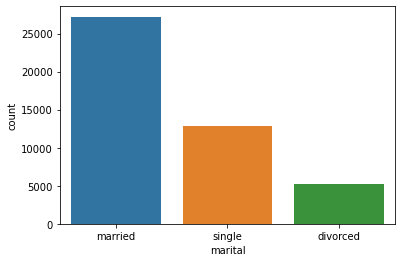

In [7]:
sns.countplot(x='marital', data=df, order=df['marital'].value_counts().index)

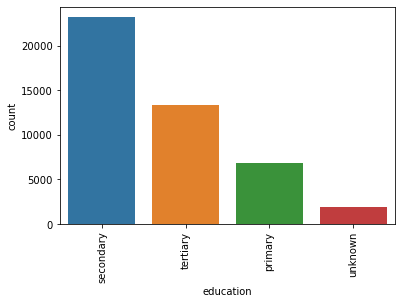

In [8]:
sns.countplot(x='education', data=df, order=df['education'].value_counts().index)
plt.xticks(rotation=90);

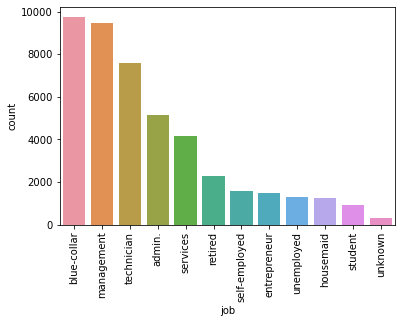

In [9]:
sns.countplot(x='job', data=df, order=df['job'].value_counts().index)
plt.xticks(rotation=90);

<AxesSubplot:>

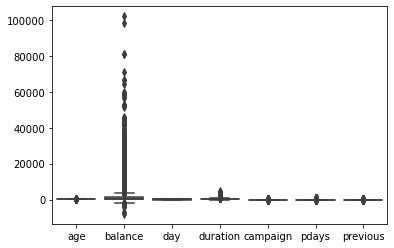

In [10]:
sns.boxplot(data=df)

In [11]:
df.shape

(45211, 17)

In [12]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:>

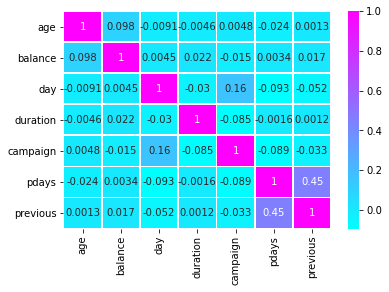

In [16]:
sns.heatmap(df.corr(), cmap='cool', annot=True, linewidth=0.75)

In [17]:
df['pdays_new'] = np.where(df['pdays'] == -1, 'y', 'n')

In [18]:
df['pdays'] = np.where(df['pdays'] == -1, 0, df['pdays'])

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [20]:
X_vif = df[['age','balance','day','duration','campaign','previous','pdays']]
calc_vif(X_vif)

,variables,VIF
0,age,5.009320
1,balance,1.212909
2,day,3.984172
3,duration,1.901362
4,campaign,1.824599
5,previous,1.340844
6,pdays,1.462040


In [21]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
pdays_new    0
dtype: int64

In [22]:
cat_cols = [x for x in df.columns if df[x].dtypes == 'O']
cat_cols
corr_df = pd.get_dummies(df[cat_cols]).corr()

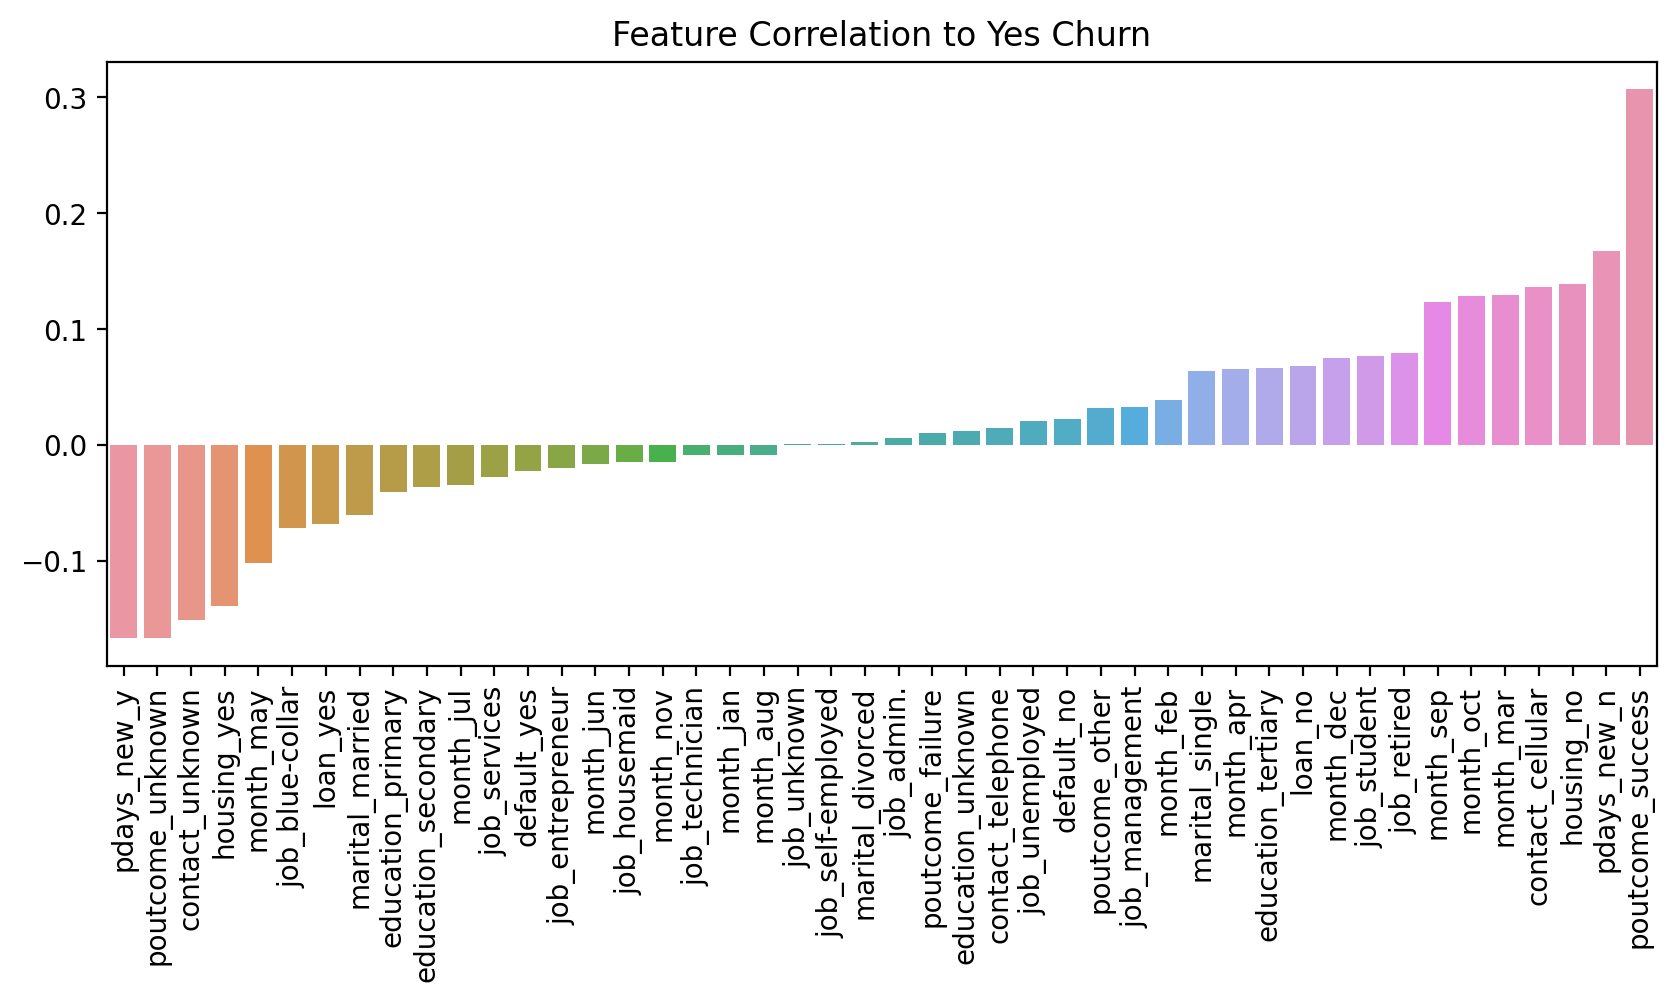

In [23]:
corr_df['y_yes'].sort_values().iloc[1:-1]
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['y_yes'].sort_values().iloc[1:-1].index,y=corr_df['y_yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [25]:
df['day'] = df['day'].astype('str')
df['campaign'] = df['campaign'].astype('str')
df['previous'] = df['previous'].astype('str')

In [26]:
X_new = pd.get_dummies(df.drop(['y'], axis=1), drop_first=True)

In [27]:
df = pd.concat([X_new, df['y']], axis=1)

In [28]:
df.head()

,age,balance,duration,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,previous_58,previous_6,previous_7,previous_8,previous_9,poutcome_other,poutcome_success,poutcome_unknown,pdays_new_y,y
0,58,2143,261,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,no
1,44,29,151,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,no
2,33,2,76,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,no
3,47,1506,92,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,no
4,33,1,198,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,no


In [29]:
from sklearn.preprocessing import MinMaxScaler
mms1 = MinMaxScaler()
mms2 = MinMaxScaler()
mms3 = MinMaxScaler()
mms4 = MinMaxScaler()

In [30]:
df['age'] = mms1.fit_transform(df[['age']])
df['balance'] = mms2.fit_transform(df[['balance']])
df['duration'] = mms3.fit_transform(df[['duration']])
df['pdays'] = mms3.fit_transform(df[['pdays']])

In [31]:
df.head()

,age,balance,duration,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,previous_58,previous_6,previous_7,previous_8,previous_9,poutcome_other,poutcome_success,poutcome_unknown,pdays_new_y,y
0,0.519481,0.092259,0.053070,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,no
1,0.337662,0.073067,0.030704,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,no
2,0.194805,0.072822,0.015453,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,no
3,0.376623,0.086476,0.018707,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,no
4,0.194805,0.072812,0.040260,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,no


In [32]:
df['y'] = df['y'].apply(lambda x:1 if x=='yes' else 0)

In [33]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

# Feature Selection

In [34]:
from scipy.stats import ttest_ind

df_y0 = df[df['y'] == 0]
df_y1 = df[df['y'] == 1]

selected_features = []
rejected_features = []

for x in df.columns:
    if x not in ['y']:
        print(f'T-test for feature {x}')
        a,b = ttest_ind(df_y0[x], df_y1[x], equal_var=False)
        print(f't-stat is {a}, pval is {b}')
        
        if b<0.05:
            print(f'Can reject null hypothesis for feature: {x}')
            print(f'Feature: {x} is significant for the model')
            selected_features.append(x)
            
        elif b>0.05:
            print(f'Cannot reject null hypothesis for feature: {x}')
            print(f'Feature: {x} is not significant for the model')
            rejected_features.append(x)
        
        print(f'**********************')

T-test for feature age
t-stat is -4.318317591167382, pval is 1.5971046743757902e-05
Can reject null hypothesis for feature: age
Feature: age is significant for the model
**********************
T-test for feature balance
t-stat is -9.933545392962273, pval is 4.383732777099304e-23
Can reject null hypothesis for feature: balance
Feature: balance is significant for the model
**********************
T-test for feature duration
t-stat is -57.514126544567894, pval is 0.0
Can reject null hypothesis for feature: duration
Feature: duration is significant for the model
**********************
T-test for feature pdays
t-stat is -18.88540738730403, pval is 2.0797029230864757e-77
Can reject null hypothesis for feature: pdays
Feature: pdays is significant for the model
**********************
T-test for feature job_blue-collar
t-stat is 17.971438462851108, pval is 9.479115310610557e-71
Can reject null hypothesis for feature: job_blue-collar
Feature: job_blue-collar is significant for the model
*********

t-stat is -5.951299854989208, pval is 2.8049827606092895e-09
Can reject null hypothesis for feature: day_30
Feature: day_30 is significant for the model
**********************
T-test for feature day_31
t-stat is 4.424923201266153, pval is 9.777119496783807e-06
Can reject null hypothesis for feature: day_31
Feature: day_31 is significant for the model
**********************
T-test for feature day_4
t-stat is -4.449405710939323, pval is 8.758493009211012e-06
Can reject null hypothesis for feature: day_4
Feature: day_4 is significant for the model
**********************
T-test for feature day_5
t-stat is 0.6238603764516328, pval is 0.5327401128165057
Cannot reject null hypothesis for feature: day_5
Feature: day_5 is not significant for the model
**********************
T-test for feature day_6
t-stat is 3.5672313588561697, pval is 0.0003631214912537996
Can reject null hypothesis for feature: day_6
Feature: day_6 is significant for the model
**********************
T-test for feature day_7
t

t-stat is 1.7320941961586103, pval is 0.08326451656680356
Cannot reject null hypothesis for feature: campaign_38
Feature: campaign_38 is not significant for the model
**********************
T-test for feature campaign_39
t-stat is 1.0, pval is 0.3173165690640167
Cannot reject null hypothesis for feature: campaign_39
Feature: campaign_39 is not significant for the model
**********************
T-test for feature campaign_4
t-stat is 5.753629873345913, pval is 9.090305049161207e-09
Can reject null hypothesis for feature: campaign_4
Feature: campaign_4 is significant for the model
**********************
T-test for feature campaign_41
t-stat is 1.414231275357889, pval is 0.1573018065601414
Cannot reject null hypothesis for feature: campaign_41
Feature: campaign_41 is not significant for the model
**********************
T-test for feature campaign_43
t-stat is 1.7320941961586103, pval is 0.08326451656680356
Cannot reject null hypothesis for feature: campaign_43
Feature: campaign_43 is not si

t-stat is -5.853257825194541, pval is 5.064091412396398e-09
Can reject null hypothesis for feature: poutcome_other
Feature: poutcome_other is significant for the model
**********************
T-test for feature poutcome_success
t-stat is -31.95067636042367, pval is 2.316000964349343e-205
Can reject null hypothesis for feature: poutcome_success
Feature: poutcome_success is significant for the model
**********************
T-test for feature poutcome_unknown
t-stat is 29.31310061761245, pval is 7.108764492493816e-177
Can reject null hypothesis for feature: poutcome_unknown
Feature: poutcome_unknown is significant for the model
**********************
T-test for feature pdays_new_y
t-stat is 29.350674550283596, pval is 2.7021727011182018e-177
Can reject null hypothesis for feature: pdays_new_y
Feature: pdays_new_y is significant for the model
**********************


In [35]:
print(selected_features)

['age', 'balance', 'duration', 'pdays', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_services', 'job_student', 'job_unemployed', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'day_10', 'day_12', 'day_13', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_2', 'day_20', 'day_21', 'day_22', 'day_25', 'day_28', 'day_29', 'day_3', 'day_30', 'day_31', 'day_4', 'day_6', 'day_7', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'campaign_10', 'campaign_12', 'campaign_13', 'campaign_14', 'campaign_15', 'campaign_16', 'campaign_18', 'campaign_19', 'campaign_2', 'campaign_20', 'campaign_21', 'campaign_22', 'campaign_23', 'campaign_25', 'campaign_26', 'campaign_27', 'campaign_28', 'campaign_30', 'campaign_31', 'campaign_33', 'ca

In [36]:
print(rejected_features)

['job_self-employed', 'job_technician', 'job_unknown', 'day_11', 'day_14', 'day_23', 'day_24', 'day_26', 'day_27', 'day_5', 'day_8', 'day_9', 'month_aug', 'campaign_11', 'campaign_17', 'campaign_24', 'campaign_29', 'campaign_3', 'campaign_32', 'campaign_37', 'campaign_38', 'campaign_39', 'campaign_41', 'campaign_43', 'campaign_44', 'campaign_46', 'campaign_50', 'campaign_51', 'campaign_55', 'campaign_58', 'campaign_63', 'previous_12', 'previous_13', 'previous_14', 'previous_15', 'previous_17', 'previous_19', 'previous_20', 'previous_21', 'previous_22', 'previous_23', 'previous_26', 'previous_275', 'previous_28', 'previous_29', 'previous_30', 'previous_32', 'previous_35', 'previous_37', 'previous_38', 'previous_40', 'previous_41', 'previous_51', 'previous_55', 'previous_58']


In [37]:
df_x = df[selected_features]
df_x['y'] = df['y']
df = df_x.copy()

<ipython-input-37-dd5cf6439326>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['y'] = df['y']


In [38]:
df.head()

,age,balance,duration,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_services,...,previous_5,previous_6,previous_7,previous_8,previous_9,poutcome_other,poutcome_success,poutcome_unknown,pdays_new_y,y
0,0.519481,0.092259,0.053070,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.337662,0.073067,0.030704,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.194805,0.072822,0.015453,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.376623,0.086476,0.018707,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0.194805,0.072812,0.040260,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


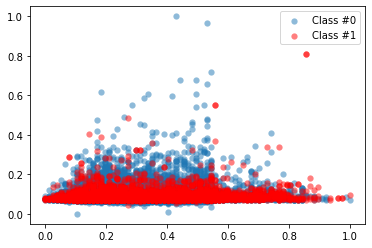

In [39]:
plt.scatter(df.age[df.y == 0], df.balance[df.y == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.age[df.y == 1], df.balance[df.y == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

In [40]:
X = df.iloc[:,:-1]
y = df['y']
X.head()

,age,balance,duration,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_services,...,previous_4,previous_5,previous_6,previous_7,previous_8,previous_9,poutcome_other,poutcome_success,poutcome_unknown,pdays_new_y
0,0.519481,0.092259,0.053070,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0.337662,0.073067,0.030704,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0.194805,0.072822,0.015453,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.376623,0.086476,0.018707,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0.194805,0.072812,0.040260,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X,y,test_size=0.2)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

C:\Users\ad20270862\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9065575583324118


col_0,0,1
y,,
0,7727,265
1,580,471


In [44]:
print(precision_score(y_test,y_predict))

0.6399456521739131


In [45]:
print(recall_score(y_test,y_predict))

0.44814462416745954


In [46]:
print(f1_score(y_test,y_predict))

0.5271404588696138


In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = \
smote.fit_resample(X_train.astype('float'), y_train)

In [48]:
df_new = X_train_smote.copy()
df_new['y'] = y_train_smote

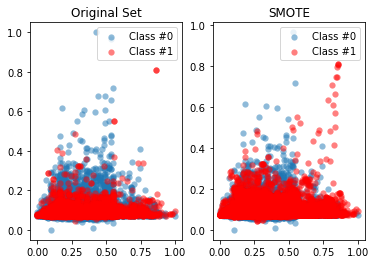

In [49]:
plt.subplot(1, 2, 1)
plt.scatter(df.age[df.y == 0], df.balance[df.y == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.age[df.y == 1], df.balance[df.y == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.title('Original Set')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.scatter(df_new.age[df_new.y == 0], df_new.balance[df_new.y == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df_new.age[df_new.y == 1], df_new.balance[df_new.y == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.title('SMOTE')
plt.legend(loc='best')
plt.show()

In [50]:
#pip install collections

In [51]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 31930, 1: 4238})
After SMOTE : Counter({0: 31930, 1: 31930})


In [52]:
len(X_train.columns)

102

In [53]:
len(X_train_smote.columns)

102

In [54]:
len(X_test.columns)

102

In [55]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

C:\Users\ad20270862\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8960521950680084


col_0,0,1
y,,
0,7515,477
1,463,588


In [56]:
print(precision_score(y_test,y_predict))

0.5521126760563381


In [57]:
print(recall_score(y_test,y_predict))

0.5594671741198858


In [58]:
print(f1_score(y_test,y_predict))

0.5557655954631379


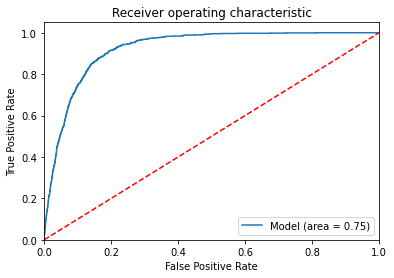

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<AxesSubplot:>

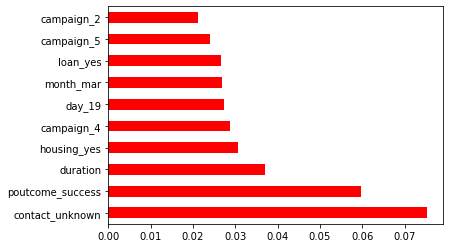

In [60]:
pd.Series(model.feature_importances_, 
          index=X_train_smote.columns).nlargest(10).plot(kind='barh', 
                                                         color='r') 

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


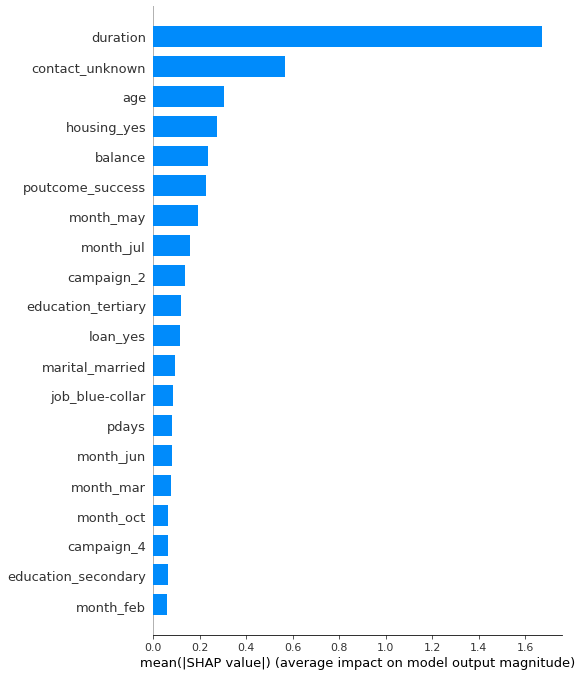

In [61]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap_obj = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

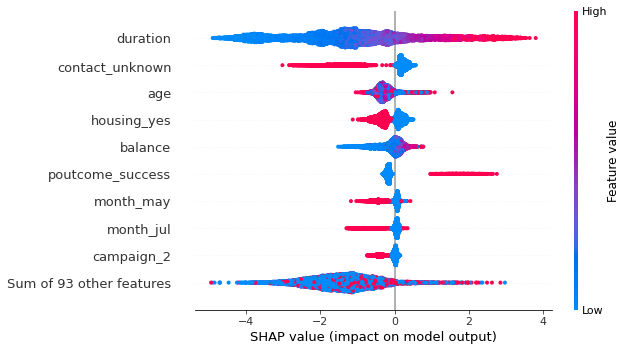

In [62]:
shap.plots.beeswarm(shap_obj)

In [63]:
model.score(X_train_smote, y_train_smote)

0.9598966489195114

In [64]:
model.score(X_test, y_test)

0.8960521950680084